In [1]:
import sys,os
import torch
sys.path.append('../')
from rdkit import DataStructs, Chem
from rdkit.Chem import MACCSkeys, Draw
from fast_jtnn import *
import pandas as pd

Load Model

In [2]:
generator = LigandGenerator()

/home/scorej41075/anaconda3/envs/chem/lib/python3.7/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


## Model Architecture

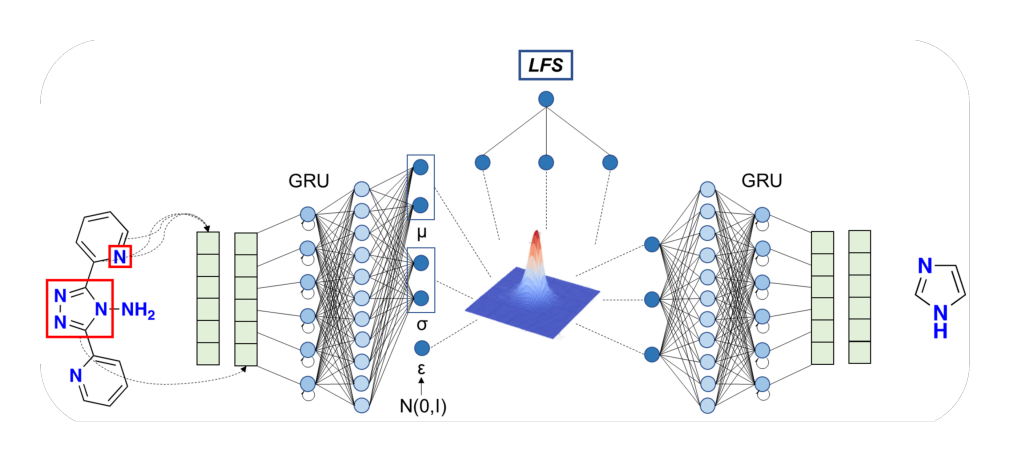

In [34]:
generator.show_model_architecture()

## Decoder

Random Sampling

In [ ]:
# Change the number of molecules to generate
numsmiles = 5

# Generate random molecules
smiles = generator.randomgen(numsmiles)

# Draw the generated molecules
if numsmiles >= 5:
    img = Draw.MolsToGridImage([Chem.MolFromSmiles(mol) for mol in smiles], molsPerRow=5, subImgSize=(500, 500), legends=smiles)
else:
    img = Draw.MolsToGridImage([Chem.MolFromSmiles(mol) for mol in smiles], molsPerRow=numsmiles, subImgSize=(500, 500), legends=smiles)

# Display the image with the generated molecules
img


In [ ]:
smiles = ['C#N', 'CC(=O)NC1=CC=C(C=C1)O', 'CC(=O)OC1=CC=CC=C1C(=O)O', 'C1=CC=C(C=C1)C=O', 'c1cc(O)ccc1', 'CCO', 'CC(C)CC1=CC=C(C=C1)C(C)C(=O)O', 'COc1cccc(C(=O)S)n1','C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3','c1ccncc1']

img = Draw.MolsToGridImage([Chem.MolFromSmiles(mol) for mol in smiles], molsPerRow=5, subImgSize=(400, 400), legends=[str(idx) for idx,i in enumerate(smiles)])
img

Sampling from Molecule Seed (without LFS)

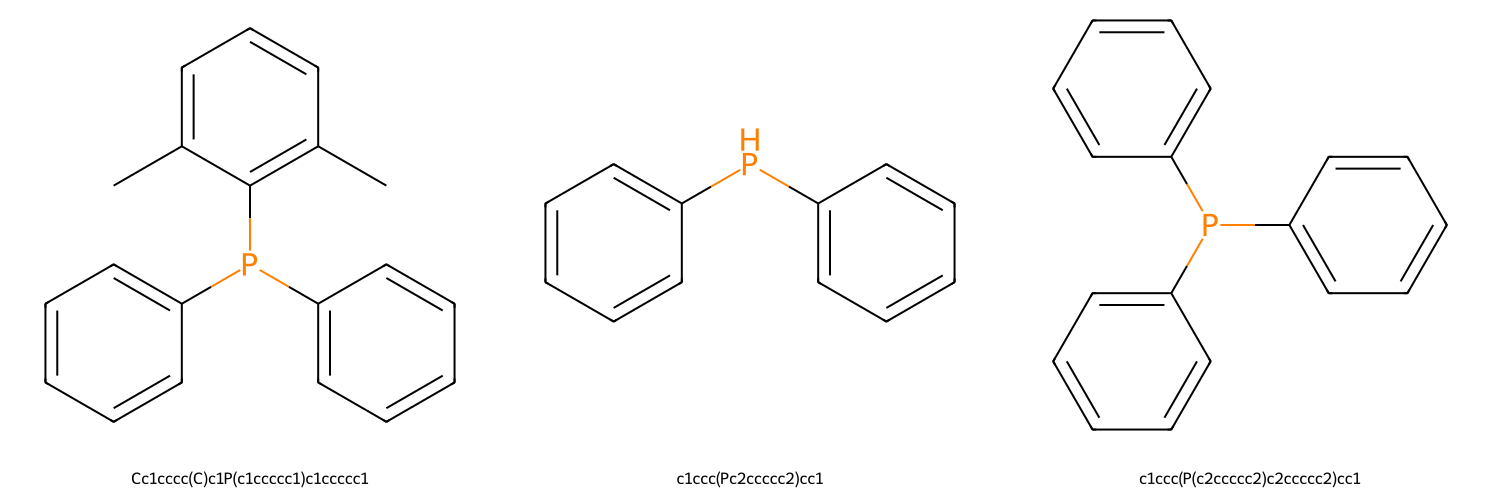

In [8]:
smiles = ['C#N', 'CC(=O)NC1=CC=C(C=C1)O', 'CC(=O)OC1=CC=CC=C1C(=O)O', 'C1=CC=C(C=C1)C=O', 'c1cc(O)ccc1', 'CCO', 'CC(C)CC1=CC=C(C=C1)C(C)C(=O)O', 'COc1cccc(C(=O)S)n1','C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3','c1ccncc1']

# Define the target molecule seed
target_smile = smiles[8]

# Specify the number of molecules to generate
numsmiles = 3

# Set the step size to create different molecules
step_size = 0.1

# Generate molecules based on the target molecule'''
smiles = generator.gen_from_target_withoutprop(target_smile, numsmiles)

# Draw the generated molecules
if numsmiles >= 5:
    img = Draw.MolsToGridImage([Chem.MolFromSmiles(mol) for mol in smiles], molsPerRow=5, subImgSize=(500, 500), legends=smiles)
else:
    img = Draw.MolsToGridImage([Chem.MolFromSmiles(mol) for mol in smiles], molsPerRow=numsmiles, subImgSize=(500, 500), legends=smiles)

# Display the image with the generated molecules
img

Optimization Target(with LFS)

In [ ]:
smiles = ['C#N', 'CC(=O)NC1=CC=C(C=C1)O', 'CC(=O)OC1=CC=CC=C1C(=O)O', 'C1=CC=C(C=C1)C=O', 'c1cc(O)ccc1', 'CCO', 'CC(C)CC1=CC=C(C=C1)C(C)C(=O)O', 'COc1cccc(C(=O)S)n1','C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3','c1ccncc1']

# Define the target molecule seed
smile = smiles[0]

# Define the target LFS values
lfs_target = 0.5

target_generator = generator.LFS_optimization(lfs_target,smile)
generator.scatter_plot(target_generator)